# 6.5 Unsupervised Machine Learning: Clustering: Airbnb Mallorca

## Table of Contents
### 1. Importing libraries and dataset
### 2. Preparing dataset for clustering
### 3. The Elbow Technique
### 4. k-means clustering

### 1. Importing libraries and dataset¶

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [115]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [116]:
path = r'C:\Users\svand\Documents\15-04-2024 Airbnb Mallorca'

In [117]:
# importing dataframe

df_v6 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_v6.csv'), index_col = 0)

### 2. Preparing dataset for clustering

In [118]:
df_v7 = df_v6

In [119]:
df_v7.head()

,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Andratx,39.543490,2.390930,Entire home,...,4.56,4.44,4.72,4.78,4.78,4.94,4.28,0.23,190.0,low in bookings
1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,f,Alcúdia,39.836700,3.151310,Entire villa,...,5.00,5.00,5.00,3.00,4.00,5.00,5.00,0.09,579.0,low in bookings
2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,f,Alcúdia,39.824417,3.114876,Entire home,...,5.00,5.00,5.00,4.90,4.90,5.00,5.00,0.47,450.0,average in bookings
3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,f,Palma de Mallorca,39.553815,2.692827,Private room in rental unit,...,5.00,5.00,5.00,5.00,5.00,5.00,4.00,0.77,52.0,low in bookings
4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,f,Palma de Mallorca,39.571850,2.634970,Entire rental unit,...,4.62,4.63,4.45,4.85,4.75,4.77,4.50,1.21,67.0,average in bookings


In [120]:
df_v7.columns

Index(['id', 'listing_url', 'name', 'picture_url', 'host_since',
       'host_is_superhost', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'nr_of_guests', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'nr_of_reviews_last12months',
       'nr_of_reviews_last30days', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_without_symbol',
       'estimation_booking_category'],
      dtype='object')

##### I am going to add a few amenities as boolean columns as I am curious what they will add to the analysis and if I can use them for this task

In [121]:
def has_pool(amenities):
    if "pool" in amenities.lower():
        return 1
    else:
        return 0

In [122]:
df_v7["swimming_pool"] = df_v7["amenities"].apply(has_pool)

In [123]:
df_v7['swimming_pool'].value_counts(dropna = False)

swimming_pool
1    7698
0    4275
Name: count, dtype: int64

In [124]:
def has_beach(amenities):
    if "beach" in amenities.lower():
        return 1
    else:
        return 0

In [125]:
df_v7["close_to_beach"] = df_v7["amenities"].apply(has_beach)

In [126]:
df_v7['close_to_beach'].value_counts(dropna = False)

close_to_beach
0    8526
1    3447
Name: count, dtype: int64

In [127]:
def has_mountainview(amenities):
    if "mountain" in amenities.lower():
        return 1
    else:
        return 0

In [128]:
df_v7["mountain_view"] = df_v7["amenities"].apply(has_mountainview)

In [129]:
df_v7['mountain_view'].value_counts(dropna = False)

mountain_view
0    8945
1    3028
Name: count, dtype: int64

In [130]:
def has_backyard(amenities):
    if "backyard" in amenities.lower():
        return 1
    else:
        return 0

In [131]:
df_v7["with_garden"] = df_v7["amenities"].apply(has_backyard)

In [132]:
df_v7['with_garden'].value_counts(dropna = False)

with_garden
1    7322
0    4651
Name: count, dtype: int64

In [133]:
def has_patioorbalcony(amenities):
    if "balcony" in amenities.lower():
        return 1
    else:
        return 0

In [134]:
df_v7["patio_or_balcony"] = df_v7["amenities"].apply(has_patioorbalcony)

In [135]:
df_v7['patio_or_balcony'].value_counts(dropna = False)

patio_or_balcony
1    8885
0    3088
Name: count, dtype: int64

In [136]:
# I am also going to change the values of host is superhost from true (t) to 1 and false (f) to 0:

df_v7['host_is_superhost'] = df_v7['host_is_superhost'].replace({'t': 1, 'f': 0})

In [137]:
df_v7['host_is_superhost'].value_counts(dropna = False)

host_is_superhost
0    8765
1    3208
Name: count, dtype: int64

In [26]:
df_v7.columns

Index(['id', 'listing_url', 'name', 'picture_url', 'host_since',
       'host_is_superhost', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'nr_of_guests', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'nr_of_reviews_last12months',
       'nr_of_reviews_last30days', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'price_without_symbol',
       'estimation_booking_category', 'swimming_pool', 'close_to_beach',
       'mountain_view', 'with_garden', 'patio_or_balcony'],
      dtype='object')

In [138]:
# Show prices more than 4000 
df_v7[df_v7['price_without_symbol'] > 4000]

,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,property_type,...,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category,swimming_pool,close_to_beach,mountain_view,with_garden,patio_or_balcony
654,49742470,https://www.airbnb.com/rooms/49742470,3 pièces 6 personnes 165285,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,0,Calvià,39.512780,2.480330,Entire rental unit,...,4.75,4.50,0.49,9999.0,low in bookings,0,1,0,0,0
927,49742459,https://www.airbnb.com/rooms/49742459,3 Pièces 6 Personnes Standard 145497,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,0,Felanitx,39.409280,3.258850,Entire rental unit,...,5.00,4.00,0.06,9999.0,low in bookings,0,1,0,0,0
2848,49742475,https://www.airbnb.com/rooms/49742475,Chambre Double Standard Climatisée 165734,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,0,Felanitx,39.408980,3.257390,Entire rental unit,...,4.80,4.30,0.43,9999.0,low in bookings,0,1,0,0,0
3169,1066064065631194122,https://www.airbnb.com/rooms/1066064065631194122,The dream valley,https://a0.muscache.com/pictures/hosting/Hosti...,2015-10-01,1,Pollença,39.878176,3.013816,Entire home,...,5.00,5.00,0.43,9000.0,low in bookings,1,0,0,0,0
10289,49742464,https://www.airbnb.com/rooms/49742464,3 Pièces 5 Personnes Vue Mer 165255,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,0,Calvià,39.518540,2.482020,Entire rental unit,...,4.50,3.75,0.18,9999.0,low in bookings,0,1,0,0,0
10409,49742458,https://www.airbnb.com/rooms/49742458,2 Pièces 4 Personnes Standard 145496,https://a0.muscache.com/pictures/prohost-api/H...,2021-05-05,0,Felanitx,39.408620,3.257540,Entire rental unit,...,4.43,4.86,0.30,9999.0,low in bookings,0,1,0,0,0
10514,22761592,https://www.airbnb.com/rooms/22761592,Belvilla by OYO Son Pelai,https://a0.muscache.com/pictures/2d79d20c-2c3c...,2017-03-23,0,Lloseta,39.716530,2.857040,Entire home,...,5.00,4.00,0.03,16800.0,low in bookings,1,0,0,0,0
11404,22761601,https://www.airbnb.com/rooms/22761601,Apartment in sea roquetas with balcony/terrace,https://a0.muscache.com/pictures/prohost-api/H...,2017-03-23,0,Campos,39.364380,2.990490,Entire home,...,5.00,5.00,0.02,21000.0,low in bookings,1,0,0,0,0


In [139]:
# Remove the extreme price values from the dataset: 

df_v7 = df_v7[df_v7['price_without_symbol'] < 4000]

In [140]:
# create subset for this task with only numeric values and the columns I want to analyze:

sub_clusters = df_v7[['host_is_superhost', 'nr_of_guests', 'price_without_symbol', 'minimum_nights', 'availability_365', 'number_of_reviews', 'nr_of_reviews_last12months', 'review_scores_rating', 
        'reviews_per_month', 'review_scores_location', 'swimming_pool', 'close_to_beach', 'mountain_view', 'with_garden', 'patio_or_balcony']]      


In [141]:
sub_clusters

,host_is_superhost,nr_of_guests,price_without_symbol,minimum_nights,availability_365,number_of_reviews,nr_of_reviews_last12months,review_scores_rating,reviews_per_month,review_scores_location,swimming_pool,close_to_beach,mountain_view,with_garden,patio_or_balcony
0,0,4,190.0,1,207,18,3,4.56,0.23,4.94,0,0,0,1,1
1,0,10,579.0,6,45,1,1,5.00,0.09,5.00,1,1,0,1,0
2,0,8,450.0,6,309,10,4,5.00,0.47,5.00,0,1,0,1,1
3,0,2,52.0,3,69,2,2,5.00,0.77,5.00,0,1,0,1,1
4,0,3,67.0,30,266,60,14,4.62,1.21,4.77,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11972,1,2,91.0,3,318,17,6,4.82,0.77,4.53,1,0,0,0,1
11973,0,5,115.0,1,362,1,1,5.00,0.35,5.00,0,0,0,1,1
11974,0,6,164.0,1,307,15,1,4.80,0.44,4.80,1,0,0,1,1
11975,0,4,75.0,7,197,17,8,4.94,0.35,4.94,0,1,0,0,1


### 3. The Elbow Technique

In [142]:
# import warnings to avoid future warning messages

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [143]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [144]:
score = [kmeans[i].fit(sub_clusters).score(sub_clusters) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

In [145]:
score

[-804232006.963156,
 -441662736.9859098,
 -292691488.56787425,
 -218823316.88976935,
 -173842480.55193752,
 -142014296.3406849,
 -125665203.65720855,
 -110776905.24103585,
 -97706284.4675407]

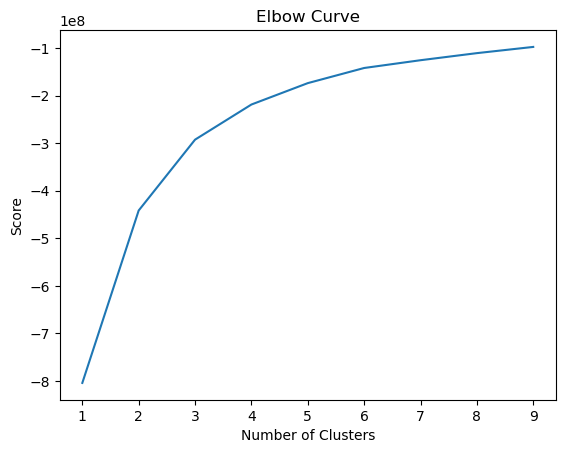

In [146]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The optimal count of clusters is 6, as the line after that straightens out

### 4. k-means clustering

In [147]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6)

In [148]:
# Fit the k-means object to the data.

kmeans.fit(sub_clusters)

KMeans(n_clusters=6)

In [149]:
sub_clusters['clusters'] = kmeans.fit_predict(sub_clusters)

C:\Users\svand\AppData\Local\Temp\ipykernel_1860\2008099888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_clusters['clusters'] = kmeans.fit_predict(sub_clusters)


In [150]:
sub_clusters.head()

,host_is_superhost,nr_of_guests,price_without_symbol,minimum_nights,availability_365,number_of_reviews,nr_of_reviews_last12months,review_scores_rating,reviews_per_month,review_scores_location,swimming_pool,close_to_beach,mountain_view,with_garden,patio_or_balcony,clusters
0,0,4,190.0,1,207,18,3,4.56,0.23,4.94,0,0,0,1,1,3
1,0,10,579.0,6,45,1,1,5.00,0.09,5.00,1,1,0,1,0,2
2,0,8,450.0,6,309,10,4,5.00,0.47,5.00,0,1,0,1,1,4
3,0,2,52.0,3,69,2,2,5.00,0.77,5.00,0,1,0,1,1,0
4,0,3,67.0,30,266,60,14,4.62,1.21,4.77,0,0,0,0,0,3


In [152]:
sub_clusters['clusters'].value_counts()

clusters
0    4640
3    4381
4    2190
2     585
1     146
5      22
Name: count, dtype: int64

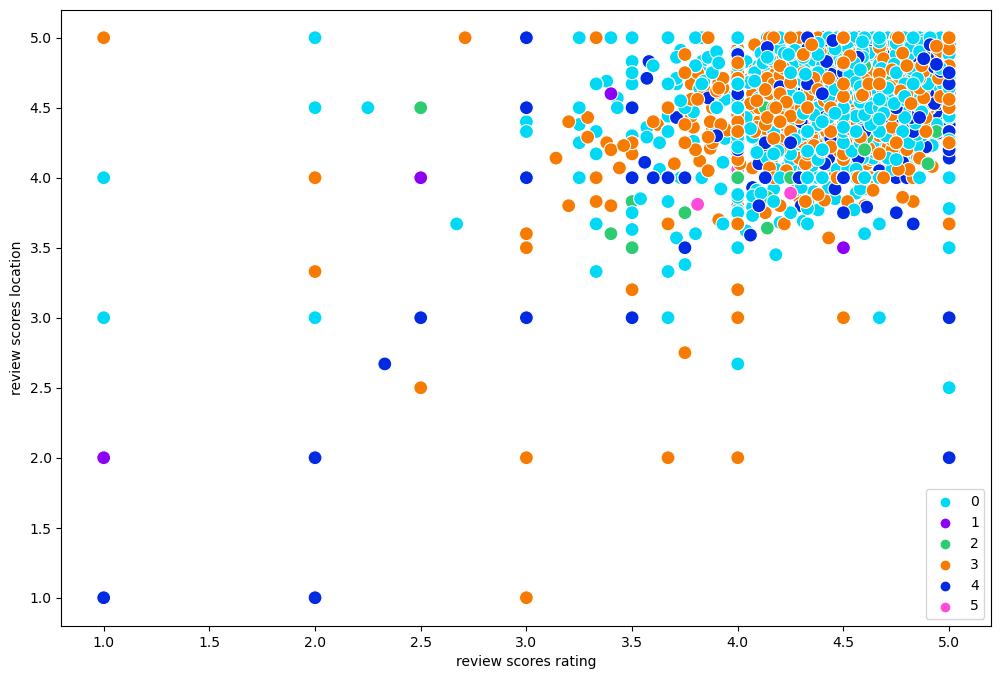

In [153]:
# Plot the clusters for the "review scores rating" and "review scores location" variables

plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#00D9F6', '#8D00F6', '#2ecc71', '#F67B00', '#002BE2', '#FF4BD8', ])  # blue, purple, green, orange, darkblue, pink

# scatterplot 
ax = sns.scatterplot(x=sub_clusters['review_scores_rating'], y=sub_clusters['review_scores_location'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('review scores rating')
plt.ylabel('review scores location')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cluster_rating_location.png')) # save figure
plt.show()


##### This chart does not give clear information on the clusters. I am going to see if it gives more clarity on price combines with listings with a swimming pool

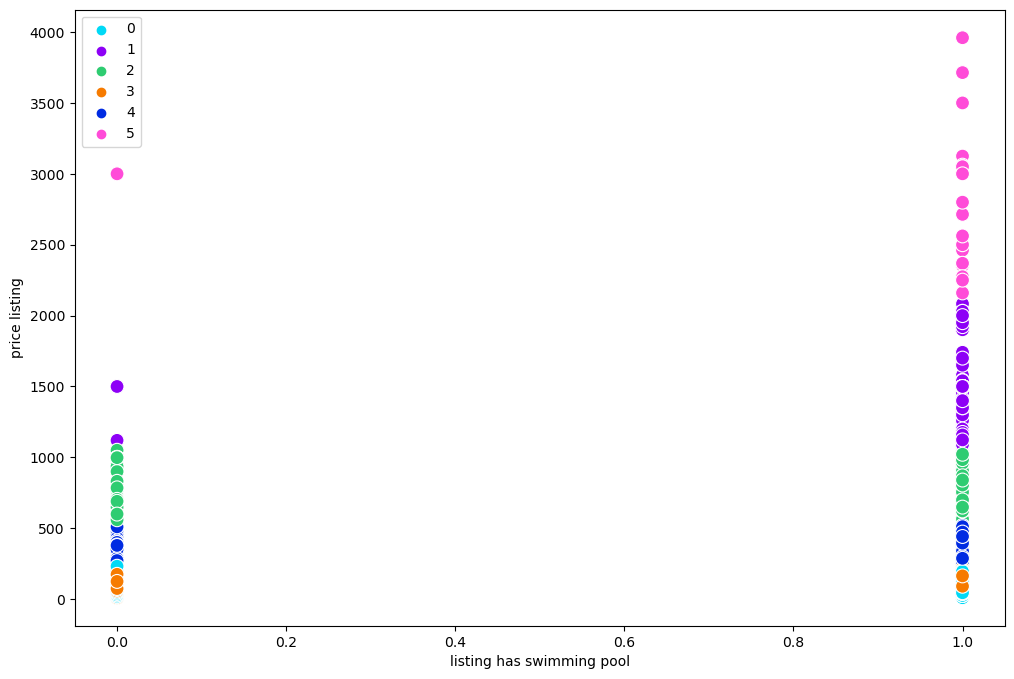

In [154]:
# Plot the clusters for the "swimming pool" and "price" variables

plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#00D9F6', '#8D00F6', '#2ecc71', '#F67B00', '#002BE2', '#FF4BD8', ])  # blue, purple, green, orange, darkblue, pink

# scatterplot 
ax = sns.scatterplot(x=sub_clusters['swimming_pool'], y=sub_clusters['price_without_symbol'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('listing has swimming pool')
plt.ylabel('price listing')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cluster_price_swimming_pool.png')) # save figure
plt.show()


##### Now it becomes clear the the clusters are moslty devided by price, only the lowest prices in the clusters (blue andorange) are overlapping each other

##### I am also going to have a look if the host is superhost has impact on the number of reviews of the last 12 months or price.

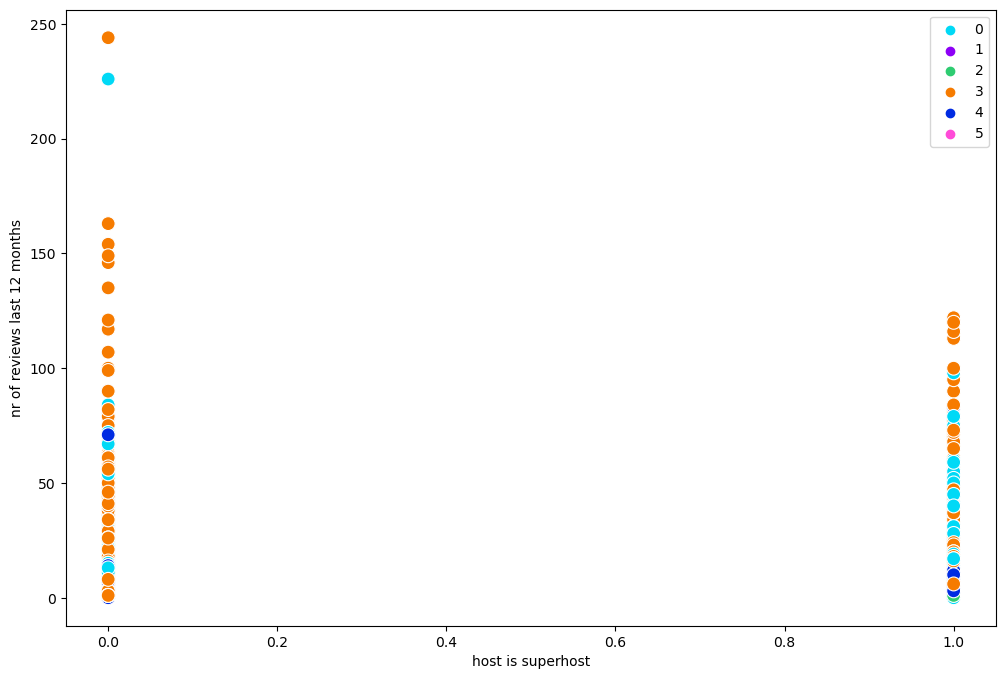

In [155]:
# Plot the clusters for the "host is superhost" and "nr of reviews last 12 months" variables

plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#00D9F6', '#8D00F6', '#2ecc71', '#F67B00', '#002BE2', '#FF4BD8', ])  # blue, purple, green, orange, darkblue, pink

# scatterplot 
ax = sns.scatterplot(x=sub_clusters['host_is_superhost'], y=sub_clusters['nr_of_reviews_last12months'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('host is superhost')
plt.ylabel('nr of reviews last 12 months')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cluster_superhost_reviews.png')) # save figure
plt.show()


##### It is not clearly visible in this chart if superhost has a big impact on the number of reviews. For sure the hosts that are not superhost also have quite a lot of reviews, it is just not visible becausthe the bubbles are on top of each other

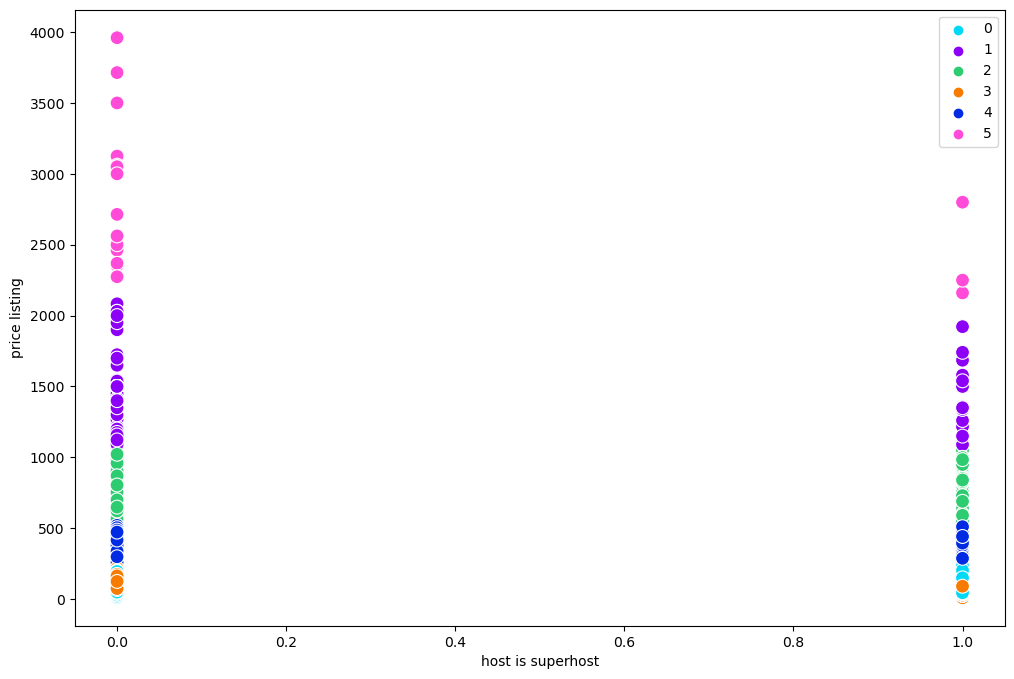

In [156]:
# Plot the clusters for the "host is superhost" and "price" variables

plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#00D9F6', '#8D00F6', '#2ecc71', '#F67B00', '#002BE2', '#FF4BD8', ])  # blue, purple, green, orange, darkblue, pink

# scatterplot 
ax = sns.scatterplot(x=sub_clusters['host_is_superhost'], y=sub_clusters['price_without_symbol'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('host is superhost')
plt.ylabel('price listing')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cluster_superhost_price.png')) # save figure
plt.show()


##### Also compared to price it show that host is superhot is not a big factor for a listing. I am also curious to see if mountain view and close to the beach have an impact on the location ratings

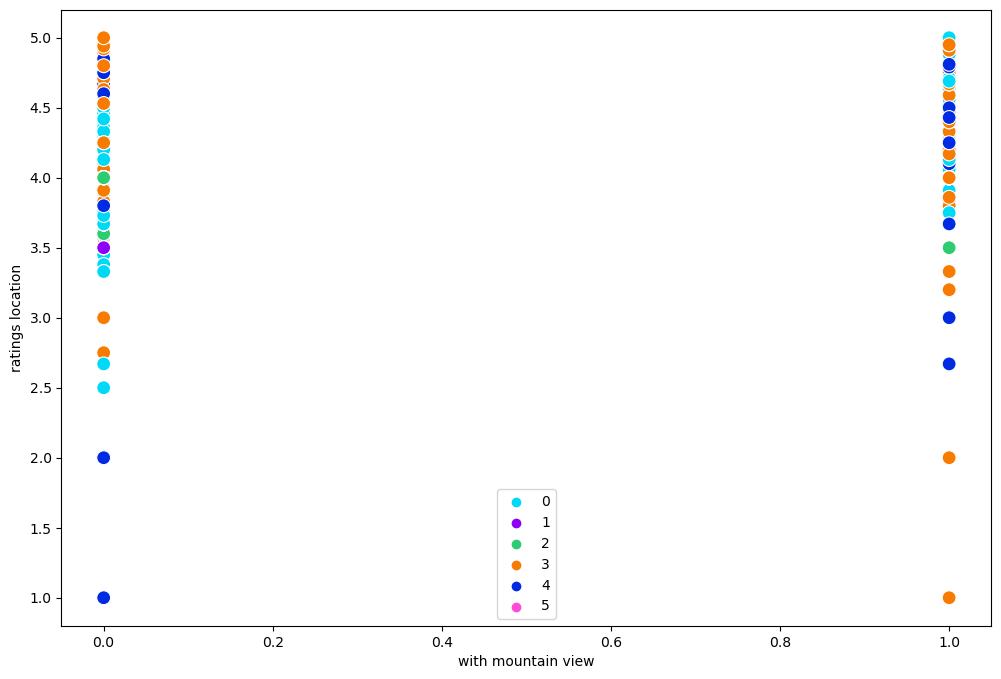

In [157]:
# Plot the clusters for the "mountain view" and "location ratings" variables

plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#00D9F6', '#8D00F6', '#2ecc71', '#F67B00', '#002BE2', '#FF4BD8', ])  # blue, purple, green, orange, darkblue, pink

# scatterplot 
ax = sns.scatterplot(x=sub_clusters['mountain_view'], y=sub_clusters['review_scores_location'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('with mountain view')
plt.ylabel('ratings location')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cluster_mountain_rating_location.png')) # save figure
plt.show()


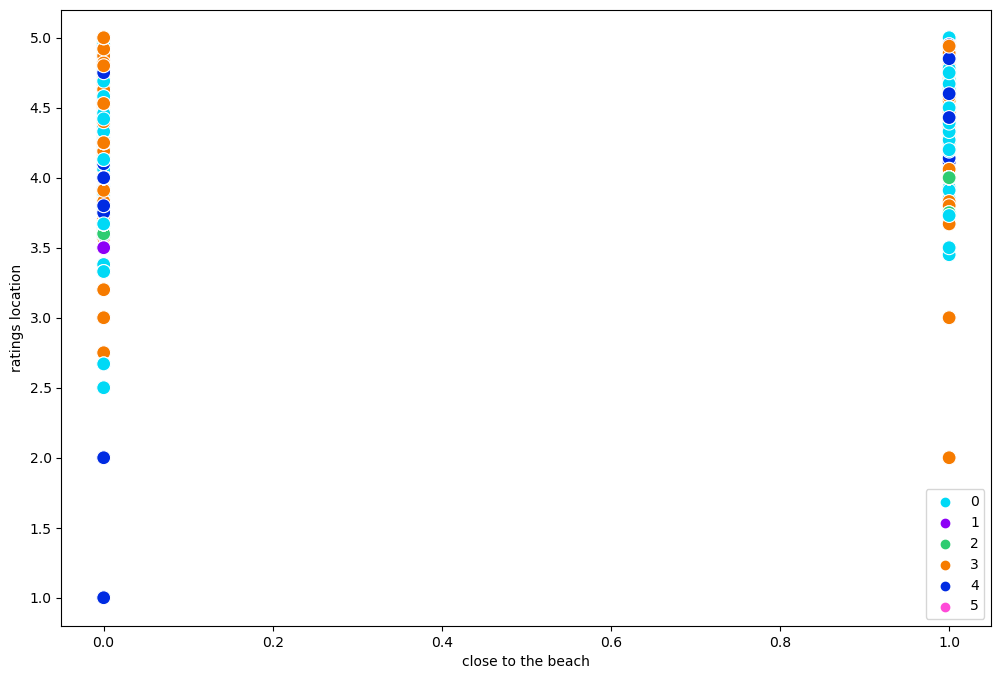

In [158]:
# Plot the clusters for the "close to beach" and "location ratings" variables

plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#00D9F6', '#8D00F6', '#2ecc71', '#F67B00', '#002BE2', '#FF4BD8', ])  # blue, purple, green, orange, darkblue, pink

# scatterplot 
ax = sns.scatterplot(x=sub_clusters['close_to_beach'], y=sub_clusters['review_scores_location'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('close to the beach')
plt.ylabel('ratings location')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cluster_mountain_rating_location.png')) # save figure
plt.show()


##### The charts don't show if there are clear differences between  location element such as mountain view or close to the beach and location ratings. The bubbles are not all visible.

In [159]:
# give names to the clusters:

sub_clusters.loc[sub_clusters['clusters'] == 5, 'cluster'] = 'pink'
sub_clusters.loc[sub_clusters['clusters'] == 4, 'cluster'] = 'darkblue'
sub_clusters.loc[sub_clusters['clusters'] == 3, 'cluster'] = 'orange'
sub_clusters.loc[sub_clusters['clusters'] == 2, 'cluster'] = 'green'
sub_clusters.loc[sub_clusters['clusters'] == 1, 'cluster'] = 'purple'
sub_clusters.loc[sub_clusters['clusters'] == 0, 'cluster'] = 'blue'

C:\Users\svand\AppData\Local\Temp\ipykernel_1860\2477155965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_clusters.loc[sub_clusters['clusters'] == 5, 'cluster'] = 'pink'


In [160]:
sub_clusters.groupby('cluster').agg({'price_without_symbol':['mean', 'median'], 
                         'nr_of_guests':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'],
                          'availability_365':['mean', 'median']})

price_without_symbol         nr_of_guests        minimum_nights  \
                         mean  median         mean median           mean   
cluster                                                                    
blue               145.646336   144.0     4.903233    5.0       3.727371   
darkblue           353.691324   344.0     7.454795    8.0       3.581279   
green              688.548718   649.0     9.203419    8.0       3.842735   
orange             136.784981   130.0     4.479571    4.0       4.209085   
pink              2866.090909  3000.0     8.909091    9.0       3.227273   
purple            1432.397260  1500.0     9.472603   10.0       5.171233   

                availability_365         
         median             mean median  
cluster                                  
blue        3.0       108.858621  111.0  
darkblue    3.0       175.766667  173.5  
green       4.0       188.241026  182.0  
orange      2.0       284.436430  279.0  
pink        2.5       231.590909  232.0  
purple      6.0       198.678082  198.0

In [166]:
sub_clusters.groupby('cluster').agg({'number_of_reviews':['mean', 'median'], 
                         'nr_of_reviews_last12months':['mean', 'median'], 
                        'review_scores_rating':['mean', 'median'],
                          'review_scores_location':['mean', 'median']})

number_of_reviews        nr_of_reviews_last12months         \
                      mean median                       mean median   
cluster                                                               
blue             28.995259   13.5                   7.667888    5.0   
darkblue         16.494977    7.0                   4.829680    2.0   
green            11.735043    5.0                   3.625641    2.0   
orange           34.122118   14.0                   9.525223    5.0   
pink             13.727273    6.0                   3.636364    2.0   
purple            6.876712    3.0                   2.582192    2.0   

         review_scores_rating        review_scores_location         
                         mean median                   mean median  
cluster                                                             
blue                 4.700308   4.80               4.712591  4.800  
darkblue             4.746224   4.89               4.697534  4.800  
green                4.784752   5.00               4.737436  4.870  
orange               4.684440   4.78               4.698331  4.780  
pink                 4.686818   4.85               4.657273  4.740  
purple               4.646644   4.90               4.723014  4.905

In [168]:
sub_clusters.groupby('cluster').agg({'host_is_superhost':['mean', 'median'], 
                         'swimming_pool':['mean', 'median'], 
                        'close_to_beach':['mean', 'median'],
                          'mountain_view':['mean', 'median'],
                        'with_garden':['mean', 'median'], 
                        'patio_or_balcony':['mean', 'median'],
                          'reviews_per_month':['mean', 'median']})

host_is_superhost        swimming_pool        close_to_beach         \
                      mean median          mean median           mean median   
cluster                                                                        
blue              0.288362    0.0      0.598922    1.0       0.300431    0.0   
darkblue          0.281279    0.0      0.865753    1.0       0.272146    0.0   
green             0.222222    0.0      0.924786    1.0       0.266667    0.0   
orange            0.249030    0.0      0.528190    1.0       0.287606    0.0   
pink              0.136364    0.0      0.954545    1.0       0.318182    0.0   
purple            0.191781    0.0      0.979452    1.0       0.198630    0.0   

         mountain_view        with_garden        patio_or_balcony         \
                  mean median        mean median             mean median   
cluster                                                                    
blue          0.228448    0.0    0.593966    1.0         0.743319    1.0   
darkblue      0.295434    0.0    0.758447    1.0         0.763927    1.0   
green         0.355556    0.0    0.753846    1.0         0.762393    1.0   
orange        0.244693    0.0    0.542570    1.0         0.736590    1.0   
pink          0.227273    0.0    0.681818    1.0         0.954545    1.0   
purple        0.246575    0.0    0.486301    0.0         0.472603    0.0   

         reviews_per_month         
                      mean median  
cluster                            
blue              0.634140   0.38  
darkblue          0.380648   0.23  
green             0.300496   0.19  
orange            0.750479   0.44  
pink              0.255000   0.17  
purple            0.236986   0.19

##### The clearest deviding in clusters I see is price. Only the lowest two price clusters are overlapping each other. There is not clarity in the clusters for the boolean values, but I find it interesting to compare the mean and median values between all of them, for example too see that in none of the clusters there are many superhosts and that in most clusters most of the listings have a swimming pool, except for the two clusters of the lower prices: blue and orange

##### I have started the analysis this way to be sure if I can use boolean numeric values or not. They are not suitable for this type of analysis. Next to this I will have to standardize the other values as there is too much of a variety in numbers. To not overwrite any previous code I will continue the analysis in a new notebook.

In [169]:
#export dataset

df_v7.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_v7.csv'))